<a href="https://colab.research.google.com/github/VasuPatel001/Electricity_Climate_Change/blob/main/CS230_Keras_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS 230 Project work: 
This project analyzes the delta increase in electricity consumption from the extreme weather data in California. 

We will begin by importing our dataset. 

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import keras
import numpy as np
import os
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/Shareddrives/CS_229_project/Electricity_Consumption_data/dataset_final.csv', usecols = ['AWND','DAPR','DASF','EVAP','MDPR','MDSF','MNPN','MXPN','PGTM','PRCP','PSUN','SN33','SN35','SNOW','SNWD','SX32','SX33','TAVG','TMAX','TMIN','TOBS','TSUN','WDF2','WDF5','WDFG','WDMV','WESD','WESF','WSF2','WSF5','WSFG','WSFI','CLASS_2'])

In [ ]:
dataset

,AWND,DAPR,DASF,EVAP,MDPR,MDSF,MNPN,MXPN,PGTM,PRCP,PSUN,SN33,SN35,SNOW,SNWD,SX32,SX33,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WDFG,WDMV,WESD,WESF,WSF2,WSF5,WSFG,WSFI,CLASS_2
0,6.161111,NaN,NaN,0.433077,NaN,NaN,62.833333,92.000000,1022.785714,0.017936,NaN,87.0,86.0,0.0,0.000000,100.0,94.0,77.408228,92.219313,65.963816,74.140271,NaN,222.051282,212.105263,266.5,63.016667,0.000000,0.0,18.770513,23.710526,32.45,14.766667,3
1,6.901000,NaN,NaN,0.399231,NaN,NaN,70.909091,96.000000,1566.384615,0.022638,NaN,88.0,86.0,0.0,0.000000,97.0,94.0,76.123028,90.745098,65.422512,73.821429,NaN,229.610390,228.701299,261.5,107.658333,0.000000,NaN,17.828571,23.131169,21.05,13.966667,3
2,6.962222,NaN,NaN,0.386923,NaN,NaN,70.181818,96.454545,1355.571429,0.019913,NaN,88.0,87.0,0.0,0.000000,98.0,94.0,74.880126,89.543372,63.893617,73.205607,NaN,246.282051,245.131579,266.5,91.963636,0.000000,NaN,16.565385,21.165789,21.90,12.733333,2
3,7.224198,NaN,NaN,0.385385,NaN,NaN,69.454545,99.363636,1531.800000,0.023578,0.0,87.0,86.0,0.0,0.000000,99.0,94.0,73.870662,88.651888,63.059211,71.646512,0.0,241.666667,233.376623,187.5,82.354545,0.000000,NaN,17.682051,22.812987,19.45,8.500000,2
4,7.927195,2.0,NaN,0.422308,0.03,NaN,69.272727,97.636364,1620.800000,0.020585,0.0,88.0,87.0,0.0,0.000000,101.0,95.0,71.583596,86.363339,61.748768,71.204651,0.0,233.544304,231.139240,182.5,121.475000,0.000000,NaN,18.098734,23.559494,24.50,12.966667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,3.629211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107.909091,0.000046,NaN,NaN,NaN,0.0,0.905405,NaN,NaN,49.119741,63.233333,41.594595,48.434109,NaN,202.162162,200.972222,NaN,NaN,0.827273,NaN,11.214865,15.180822,NaN,22.700000,1
2332,3.940133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1667.909091,0.006898,NaN,NaN,NaN,0.0,0.868421,NaN,NaN,50.200647,61.282105,42.654737,47.637795,NaN,224.931507,219.583333,NaN,NaN,0.842424,NaN,12.267123,16.265753,NaN,29.850000,1
2333,4.232400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1270.727273,0.020514,NaN,NaN,NaN,0.0,0.930556,NaN,NaN,49.592233,61.242616,43.205074,46.952000,NaN,263.835616,246.197183,NaN,NaN,0.809091,NaN,12.458904,16.500000,NaN,32.650000,1
2334,4.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.727273,0.003252,NaN,NaN,NaN,0.0,1.029851,NaN,NaN,48.344156,61.827957,41.189247,46.000000,NaN,240.958904,227.638889,NaN,NaN,0.760606,NaN,12.546575,16.390411,NaN,14.200000,0


In [ ]:
#Applying Linear Discriminant Analysis
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, tol = 0.0001, covariance_estimator=None)
# fit_transform(x_train_norm, y_train)
# clf.fit(x_train_norm, y_train)
# LinearDiscriminantAnalysis()

We now have imported our dataset. We move into creating our layers and then working through our layers. 

In [ ]:
#split train & test dataset
train = dataset.sample(frac=0.8) #random_state=0
test = dataset.drop(train.index)
print(train.shape, test.shape)

(1869, 33) (467, 33)


One hot encoding for Train & Test dataset

In [ ]:
#Create one-hot encoding for TRAIN dataset
existing_vals = np.unique(train['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_train = np.array([mapping[y] for y in train['CLASS_2'].values])
y_train = np_utils.to_categorical(y_train)
print(y_train.shape)
y_train

(1869, 5)


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
#Create one-hot encoding for TEST dataset
existing_vals = np.unique(test['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_test = np.array([mapping[x] for x in test['CLASS_2'].values])
y_test = np_utils.to_categorical(y_test)

print(y_test.shape)
y_test

(467, 5)


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
#sns.pairplot(train[['CLASS_2', 'AWND', 'PRCP', 'SNWD', 'TAVG', 'TMIN', 'TMAX']], diag_kind='kde')

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,1869.0,6.336616,1.697368,2.851139,5.100658,6.266267,7.352597,13.221194
DAPR,890.0,3.437594,2.337339,2.000000,2.000000,3.000000,3.666667,31.000000
DASF,2.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000
EVAP,1855.0,0.219079,0.231385,-1.033333,0.088333,0.206923,0.325385,4.439091
MDPR,886.0,0.426484,0.955709,0.000000,0.000000,0.040000,0.497500,14.830000
MDSF,2.0,35.000000,32.512770,12.010000,23.505000,35.000000,46.495000,57.990000
MNPN,1855.0,51.972030,9.185035,26.000000,44.190909,52.000000,60.045455,71.800000
MXPN,1855.0,75.089538,15.335797,40.000000,61.140909,76.200000,89.000000,168.500000
PGTM,1869.0,1342.403746,231.432468,291.545455,1205.545455,1374.900000,1504.200000,2044.875000
PRCP,1869.0,0.061440,0.154533,0.000000,0.000412,0.004069,0.036254,1.465031


In [ ]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,467.0,6.271174,1.774428,2.968272,4.930953,6.220411,7.274054,12.976750
DAPR,212.0,3.492020,2.174179,2.000000,2.000000,3.000000,3.635417,16.400000
DASF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVAP,460.0,0.247895,0.762395,-0.130833,0.099583,0.200000,0.319375,16.210000
MDPR,210.0,0.451189,0.944598,0.000000,0.000000,0.033333,0.455000,7.052500
MDSF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MNPN,460.0,52.000709,9.301772,29.666667,44.000000,52.261111,59.937500,70.800000
MXPN,460.0,75.073969,15.946215,41.666667,61.888889,76.738636,87.956818,178.000000
PGTM,467.0,1341.274763,241.063144,477.200000,1230.212121,1376.769231,1503.025000,1997.400000
PRCP,467.0,0.056689,0.140803,0.000000,0.000699,0.004075,0.035125,1.017445


Train and test data cleaning

In [ ]:
#train data normalization
train_features = train.copy()
train_labels = train_features.pop('CLASS_2')
train_labels

261     1
1348    4
1500    2
1851    2
1426    0
       ..
1258    1
2087    1
377     2
201     1
1548    2
Name: CLASS_2, Length: 1869, dtype: int64

In [ ]:
#test data normalization
test_features = test.copy()
test_labels = test_features.pop('CLASS_2')
test_labels

2       2
14      2
15      2
17      2
39      1
       ..
2318    1
2321    0
2326    1
2328    0
2332    1
Name: CLASS_2, Length: 467, dtype: int64

In [ ]:
print(y_train)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# train_features.shape
x_train_clean = train_features.fillna(0).dropna()

In [ ]:
#test feature cleaning 
x_test_clean = test_features.fillna(0).dropna()
x_test_clean

,AWND,DAPR,DASF,EVAP,MDPR,MDSF,MNPN,MXPN,PGTM,PRCP,PSUN,SN33,SN35,SNOW,SNWD,SX32,SX33,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WDFG,WDMV,WESD,WESF,WSF2,WSF5,WSFG,WSFI
2,6.962222,0.0,0.0,0.386923,0.0,0.0,70.181818,96.454545,1355.571429,0.019913,0.0,88.0,87.0,0.000000,0.000000,98.0,94.0,74.880126,89.543372,63.893617,73.205607,0.0,246.282051,245.131579,266.5,91.963636,0.000000,0.0,16.565385,21.165789,21.90,12.733333
14,6.912651,3.0,0.0,0.370769,0.0,0.0,60.000000,88.500000,1587.625000,0.000145,0.0,86.0,86.0,0.000000,0.000000,97.0,93.0,70.116719,85.723127,57.398026,68.640909,0.0,255.500000,244.875000,169.0,54.783333,0.000000,0.0,16.568750,21.641250,28.50,11.566667
15,6.778916,0.0,0.0,0.344167,0.0,0.0,59.181818,87.909091,1529.375000,0.000723,0.0,86.0,87.0,0.000000,0.000000,97.0,92.0,72.018927,87.387622,59.026187,69.796380,0.0,256.000000,240.500000,182.5,102.016667,0.000000,0.0,17.146250,22.132500,27.95,13.500000
17,6.293373,0.0,0.0,0.392308,0.0,0.0,65.454545,96.545455,1161.250000,0.097582,0.0,87.0,87.0,0.000000,0.000000,99.0,94.0,69.396825,84.896839,59.483278,68.086957,0.0,203.250000,195.128205,269.0,54.381818,0.000000,0.0,19.185000,24.582051,25.95,14.233333
39,6.106625,0.0,0.0,0.317692,0.0,0.0,65.727273,92.090909,1561.307692,0.001851,0.0,84.0,86.0,0.000000,0.000000,94.0,90.0,69.082278,85.179104,56.599665,68.061905,0.0,236.103896,228.961039,289.0,66.318182,0.000000,0.0,16.463636,21.490909,18.00,14.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,5.919474,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1279.000000,0.063095,0.0,0.0,0.0,0.000000,0.969231,0.0,0.0,54.819936,67.127119,47.072187,51.966667,0.0,245.945946,243.287671,0.0,0.000000,0.745455,0.0,15.451351,20.002703,0.00,27.050000
2321,5.280000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1342.416667,0.004880,0.0,0.0,0.0,0.052632,0.953846,0.0,0.0,46.321543,60.312236,40.529536,45.818966,0.0,241.621622,242.191781,0.0,0.000000,0.672727,0.0,13.964865,17.875676,0.00,21.000000
2326,4.212078,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1323.636364,0.000882,0.0,0.0,0.0,0.000000,1.461538,0.0,0.0,58.267742,72.414163,49.578495,52.336207,0.0,226.533333,203.150685,0.0,0.000000,1.084848,0.0,12.512000,16.490667,0.00,10.400000
2328,3.355584,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1356.666667,0.001773,0.0,0.0,0.0,0.000000,2.117647,0.0,0.0,58.741935,73.417012,49.336100,54.125984,0.0,234.133333,220.410959,0.0,0.000000,0.957576,0.0,10.117333,12.894595,0.00,12.200000


Normalizing our train & test clean data set

In [ ]:
#normalize x_train_clean 
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train_clean)
x_train_norm = normalizer(x_train_clean)
x_train_norm.shape

TensorShape([1869, 32])

In [ ]:
#normalize x_test_clean
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_test_clean)
x_test_norm = normalizer(x_test_clean)
x_test_norm.shape

TensorShape([467, 32])

Create model

In [ ]:
#Import CLASS_2es
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

#Model Definition
model = Sequential()
model.add(Input(shape=(32,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))


In [ ]:
#Configure model training
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # 

Model Fit

In [ ]:
#train model
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0005)
history = model.fit(x_train_norm, y_train, validation_split=0.1, epochs=500)

Epoch 1/500
53/53 [==============================] - 1s 6ms/step - loss: 1.4405 - accuracy: 0.4512 - val_loss: 1.2154 - val_accuracy: 0.5401
Epoch 2/500
53/53 [==============================] - 0s 2ms/step - loss: 1.2404 - accuracy: 0.4976 - val_loss: 1.0816 - val_accuracy: 0.5401
Epoch 3/500
53/53 [==============================] - 0s 3ms/step - loss: 1.1292 - accuracy: 0.5220 - val_loss: 0.9808 - val_accuracy: 0.6203
Epoch 4/500
53/53 [==============================] - 0s 3ms/step - loss: 1.0399 - accuracy: 0.5779 - val_loss: 0.9030 - val_accuracy: 0.6364
Epoch 5/500
53/53 [==============================] - 0s 3ms/step - loss: 0.9498 - accuracy: 0.5981 - val_loss: 0.8668 - val_accuracy: 0.6364
Epoch 6/500
53/53 [==============================] - 0s 3ms/step - loss: 0.9369 - accuracy: 0.5844 - val_loss: 0.8550 - val_accuracy: 0.6257
Epoch 7/500
53/53 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy: 0.6171 - val_loss: 0.8471 - val_accuracy: 0.6471
Epoch 8/500
5

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


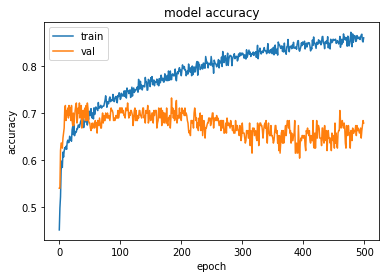

In [ ]:
#plot training accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

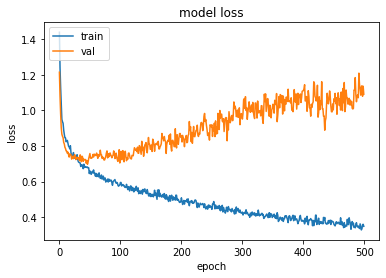

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model predict

In [ ]:
#predict on testing dataset
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.0008)
y_pred = model.predict(x_test_norm)
y_pred
#print('y_pred',y_pred)
y_pred.shape, y_test.shape
y_test = y_test.argmax(axis=-1)
print('y_test', y_test)
y_pred = y_pred.argmax(axis=-1)
print('y_pred',y_pred)


y_test [2 2 2 2 1 2 3 3 3 3 4 2 2 3 2 2 3 3 2 2 2 3 3 2 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 2 1 1 1 2 3 3 2 2 4 3 3 2 2 3 2 1 2 2 1 3 2 1 1 1 1 2 1 0 1 2 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 2 1 3 4 3 3 2 3 3 4 3 3 3 2 2 2 2 2 2 3 3 3 2 3 2 1 1 2 2 1 1 1 1 2 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1
 1 2 1 2 2 2 3 3 4 3 3 3 3 4 3 2 4 3 3 2 2 2 1 2 2 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 3 1 1 2 2 3 3 2 3 3 3 2 2 3 3 1 2 2 3 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 2 2 1 2 1 1 1 1 1 1 1 2 2
 2 1 2 2 2 2 3 3 3 3 2 1 2 2 1 2 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 2 3 2 2 2 2 2
 2 3 3 3 3 1 2 2 3 2 1 1 0 1 1 1 1 1 1 0 1 0 1]
y_pred [3 2 3 2 2 2 3 2 4 3 3 2 2 3 3 1 2 3 2

In [ ]:
#Compute Recall, precision, f1_score
# from sklearn.metrics import precision_score , recall_score

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.32      0.37        76
           1       0.75      0.82      0.78       245
           2       0.65      0.67      0.66        84
           3       0.67      0.60      0.63        55
           4       0.36      0.57      0.44         7

    accuracy                           0.68       467
   macro avg       0.58      0.59      0.58       467
weighted avg       0.67      0.68      0.67       467



In [ ]:
#Compute confusion matrix using accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
test_acc = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[ 24,  51,   1,   0,   0],
       [ 29, 201,  15,   0,   0],
       [  0,  15,  56,  13,   0],
       [  0,   1,  14,  33,   7],
       [  0,   0,   0,   3,   4]])

Class=3, n=1203 (20.000%)
Class=2, n=1203 (20.000%)
Class=1, n=1203 (20.000%)
Class=4, n=1203 (20.000%)
Class=0, n=1203 (20.000%)


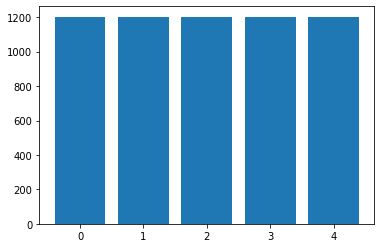

In [ ]:
#SMOTE Implementation 
#Link: https://machinelearningmastery.com/multi-class-imbalanced-classification/ 

# example of oversampling a multi-class classification dataset
from pandas import read_csv
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# define the dataset location
url = '/content/drive/Shareddrives/CS_229_project/Electricity_Consumption_data/dataset_final.csv'
# load the csv file as a data frame
df = read_csv(url, usecols=['AWND','DAPR','DASF','EVAP','MDPR','MDSF','MNPN','MXPN','PGTM','PRCP','PSUN','SN33','SN35','SNOW','SNWD','SX32','SX33','TAVG','TMAX','TMIN','TOBS','TSUN','WDF2','WDF5','WDFG','WDMV','WESD','WESF','WSF2','WSF5','WSFG','WSFI','CLASS_2'])
df = df.fillna(0).dropna()
data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=958 (15.927%)
Class=4, n=32 (0.532%)
Class=2, n=357 (5.935%)
Class=0, n=319 (5.303%)
Class=3, n=203 (3.375%)


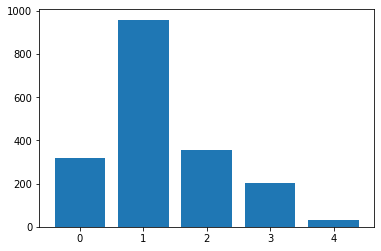

In [ ]:
# summarize distribution
counter = Counter(train_labels)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#Latest X & y values
print('X',X.shape)
print('y', y.shape)
#print('X:',X)
#print('y:',y)
#type(X)
type(y)
n = X.shape[0]

X (6015, 32)
y (6015,)


In [ ]:
#Concetanate X & y
y = np.reshape(y, (n,1))
print('y',y)
data = np.concatenate((X, y), axis=1)
print(data)

y [[3]
 [3]
 [2]
 ...
 [4]
 [4]
 [4]]
[[ 6.16111111  0.          0.         ... 32.45       14.76666667
   3.        ]
 [ 6.901       0.          0.         ... 21.05       13.96666667
   3.        ]
 [ 6.96222222  0.          0.         ... 21.9        12.73333333
   2.        ]
 ...
 [ 6.17738283  2.          0.         ... 23.41912743 10.32465455
   4.        ]
 [ 5.24708586  0.47733955  0.         ... 28.27261144 16.98413769
   4.        ]
 [ 5.64744085  0.          0.         ... 25.28731821 15.66266722
   4.        ]]


In [ ]:
#Convert 'data' to pandas dataframe
dataset_s = pd.DataFrame(data, columns=['AWND','DAPR','DASF','EVAP','MDPR','MDSF','MNPN','MXPN','PGTM','PRCP','PSUN','SN33','SN35','SNOW','SNWD','SX32','SX33','TAVG','TMAX','TMIN','TOBS','TSUN','WDF2','WDF5','WDFG','WDMV','WESD','WESF','WSF2','WSF5','WSFG','WSFI','CLASS_2'])
dataset_s

,AWND,DAPR,DASF,EVAP,MDPR,MDSF,MNPN,MXPN,PGTM,PRCP,PSUN,SN33,SN35,SNOW,SNWD,SX32,SX33,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WDFG,WDMV,WESD,WESF,WSF2,WSF5,WSFG,WSFI,CLASS_2
0,6.161111,0.000000,0.0,0.433077,0.000000,0.0,62.833333,92.000000,1022.785714,0.017936,0.0,87.000000,86.000000,0.0,0.000000,100.000000,94.000000,77.408228,92.219313,65.963816,74.140271,0.0,222.051282,212.105263,266.500000,63.016667,0.000000,0.0,18.770513,23.710526,32.450000,14.766667,3.0
1,6.901000,0.000000,0.0,0.399231,0.000000,0.0,70.909091,96.000000,1566.384615,0.022638,0.0,88.000000,86.000000,0.0,0.000000,97.000000,94.000000,76.123028,90.745098,65.422512,73.821429,0.0,229.610390,228.701299,261.500000,107.658333,0.000000,0.0,17.828571,23.131169,21.050000,13.966667,3.0
2,6.962222,0.000000,0.0,0.386923,0.000000,0.0,70.181818,96.454545,1355.571429,0.019913,0.0,88.000000,87.000000,0.0,0.000000,98.000000,94.000000,74.880126,89.543372,63.893617,73.205607,0.0,246.282051,245.131579,266.500000,91.963636,0.000000,0.0,16.565385,21.165789,21.900000,12.733333,2.0
3,7.224198,0.000000,0.0,0.385385,0.000000,0.0,69.454545,99.363636,1531.800000,0.023578,0.0,87.000000,86.000000,0.0,0.000000,99.000000,94.000000,73.870662,88.651888,63.059211,71.646512,0.0,241.666667,233.376623,187.500000,82.354545,0.000000,0.0,17.682051,22.812987,19.450000,8.500000,2.0
4,7.927195,2.000000,0.0,0.422308,0.030000,0.0,69.272727,97.636364,1620.800000,0.020585,0.0,88.000000,87.000000,0.0,0.000000,101.000000,95.000000,71.583596,86.363339,61.748768,71.204651,0.0,233.544304,231.139240,182.500000,121.475000,0.000000,0.0,18.098734,23.559494,24.500000,12.966667,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,5.789527,0.825699,0.0,0.363144,0.474777,0.0,67.653209,93.170646,1354.659224,0.003614,0.0,83.587150,84.000000,0.0,0.000000,91.587150,88.587150,76.320842,93.394428,63.372934,72.786065,0.0,223.607617,213.052225,240.000000,39.638671,0.000000,0.0,16.301729,21.372142,22.702736,21.829772,4.0
6011,6.859866,0.000000,0.0,0.417548,0.000000,0.0,69.688144,97.505798,1570.102811,0.003976,0.0,85.000000,81.176547,0.0,1.938858,97.470359,91.823453,78.376976,94.616619,64.765051,75.492420,0.0,258.861459,243.892701,230.000000,39.749060,5.159325,0.0,16.289140,21.373759,13.477067,14.585504,4.0
6012,6.177383,2.000000,0.0,0.353204,0.000000,0.0,62.125576,92.467295,1414.538459,0.001904,0.0,81.964779,82.964779,0.0,0.000000,89.929558,86.964779,76.974445,91.789553,64.593099,73.689989,0.0,251.643380,242.625233,210.352208,47.176809,0.000000,0.0,15.709867,20.210882,23.419127,10.324655,4.0
6013,5.247086,0.477340,0.0,0.395570,0.000000,0.0,65.769968,94.598405,1331.152677,0.002913,0.0,86.363547,85.886208,0.0,0.351885,96.159113,91.681774,80.545454,96.978473,66.036589,77.549635,0.0,249.615557,240.541722,230.000000,39.939673,0.911767,0.0,14.714821,19.052847,28.272611,16.984138,4.0


In [ ]:
#split train & test dataset
train_s = dataset_s.sample(frac=0.9) #random_state=0
test_s = dataset_s.drop(train_s.index)
print(train_s.shape, test_s.shape)

(5414, 33) (601, 33)


In [ ]:
#Create one-hot encoding for TRAIN dataset
existing_vals = np.unique(train_s['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_train_s = np.array([mapping[y] for y in train_s['CLASS_2'].values])
y_train_s = np_utils.to_categorical(y_train_s)
print(y_train_s.shape)
y_train_s

(5414, 5)


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#Create one-hot encoding for TEST dataset
existing_vals = np.unique(test_s['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_test_s = np.array([mapping[x] for x in test_s['CLASS_2'].values])
y_test_s = np_utils.to_categorical(y_test_s)

print(y_test_s.shape)
y_test_s

(601, 5)


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#train data normalization
train_features_s = train_s.copy()
train_labels_s = train_features_s.pop('CLASS_2')
train_labels_s

5227    4.0
380     3.0
2172    1.0
5695    4.0
1690    0.0
       ... 
2323    1.0
3918    3.0
2655    0.0
1385    0.0
5293    4.0
Name: CLASS_2, Length: 5414, dtype: float64

In [ ]:
#test data normalization
test_features_s = test_s.copy()
test_labels_s = test_features_s.pop('CLASS_2')
test_labels_s

2       2.0
3       2.0
6       2.0
26      2.0
53      2.0
       ... 
5955    4.0
5976    4.0
5990    4.0
5997    4.0
6005    4.0
Name: CLASS_2, Length: 601, dtype: float64

In [ ]:
#Clean x_train_s & x_test_s
x_train_clean_s = train_features_s.fillna(0).dropna()
x_test_clean_s = test_features_s.fillna(0).dropna()
print(x_train_clean_s)
print(x_test_clean_s)

          AWND      DAPR  DASF  ...       WSF5       WSFG       WSFI
5227  6.088502  0.000000   0.0  ...  20.889814  34.755388  17.282868
380   7.313210  0.000000   0.0  ...  22.316883  15.000000  14.933333
2172  7.471688  6.000000   0.0  ...  22.907576  30.000000  19.000000
5695  5.521240  1.804255   0.0  ...  20.220528  33.148082  11.347447
1690  4.145065  8.000000   0.0  ...  15.800000  17.000000  21.450000
...        ...       ...   ...  ...        ...        ...        ...
2323  6.848947  0.000000   0.0  ...  24.871233   0.000000  34.350000
3918  6.694095  0.000000   0.0  ...  21.884414   1.346782  17.453416
2655  4.156169  3.959614   0.0  ...  16.330960  26.565847  13.650000
1385  7.837848  2.500000   0.0  ...  23.749351  25.100000  24.800000
5293  6.235022  5.702035   0.0  ...  21.240748  28.499104  10.891194

[5414 rows x 32 columns]
          AWND      DAPR  DASF  ...       WSF5       WSFG       WSFI
2     6.962222  0.000000   0.0  ...  21.165789  21.900000  12.733333
3     7.

In [ ]:
#normalize x_train_clean 
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train_clean_s)
x_train_norm_s = normalizer(x_train_clean_s)
x_train_norm_s.shape

TensorShape([5414, 32])

In [ ]:
#normalize x_test_clean
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_test_clean_s)
x_test_norm_s = normalizer(x_test_clean_s)
x_test_norm_s.shape

TensorShape([601, 32])

In [ ]:
#Import CLASS_2es
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers

#Model Definition
model = Sequential()
model.add(Input(shape=(32,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
#Configure model training
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0009)
history = model.fit(x_train_norm_s, y_train_s, validation_split=0.2, epochs=500)

Epoch 1/500
136/136 [==============================] - 1s 4ms/step - loss: 1.2741 - accuracy: 0.3974 - val_loss: 0.9447 - val_accuracy: 0.5522
Epoch 2/500
136/136 [==============================] - 0s 3ms/step - loss: 0.9537 - accuracy: 0.5507 - val_loss: 0.7240 - val_accuracy: 0.6999
Epoch 3/500
136/136 [==============================] - 0s 3ms/step - loss: 0.8020 - accuracy: 0.6253 - val_loss: 0.6435 - val_accuracy: 0.7018
Epoch 4/500
136/136 [==============================] - 0s 3ms/step - loss: 0.7406 - accuracy: 0.6523 - val_loss: 0.5923 - val_accuracy: 0.7202
Epoch 5/500
136/136 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.6749 - val_loss: 0.5818 - val_accuracy: 0.7452
Epoch 6/500
136/136 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6989 - val_loss: 0.5315 - val_accuracy: 0.7608
Epoch 7/500
136/136 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.7250 - val_loss: 0.5187 - val_accuracy: 0.7599

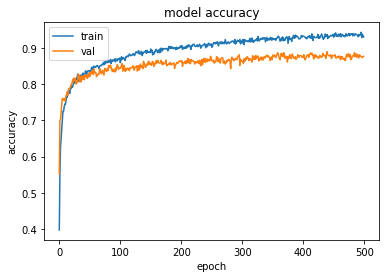

In [ ]:
#plot training accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

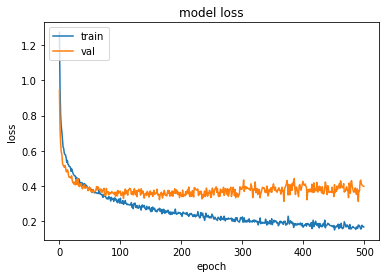

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test_s

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#predict on testing dataset
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.0008)
y_pred_s = model.predict(x_test_norm_s)
y_pred_s.shape, y_test_s.shape

y_test_s = y_test_s.argmax(axis=-1)
print('y_test_s', y_test_s)
y_pred_s = y_pred_s.argmax(axis=-1)
print('y_pred_s',y_pred_s)

y_test_s [2 2 2 2 2 3 1 2 1 2 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 2 2 2
 1 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 1
 1 2 3 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 3 3 4 3 2 2 2 2 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 3 3 2 2 3 2 3 3 3 2 2 2 1 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 2 3 2 2 2 2 3 4 3 4
 3 3 2 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 2 2 2 3 3 2 3 3 3 2 2 2
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3

In [ ]:
#Compute Recall, precision, f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       136
           1       0.74      0.73      0.73       117
           2       0.83      0.93      0.88       122
           3       0.93      0.89      0.91       114
           4       1.00      0.97      0.99       112

    accuracy                           0.86       601
   macro avg       0.86      0.86      0.86       601
weighted avg       0.86      0.86      0.86       601

